### Author: Paweł Szyszka

Below example contains code written in Python using Google colab.

Creating regression dataset

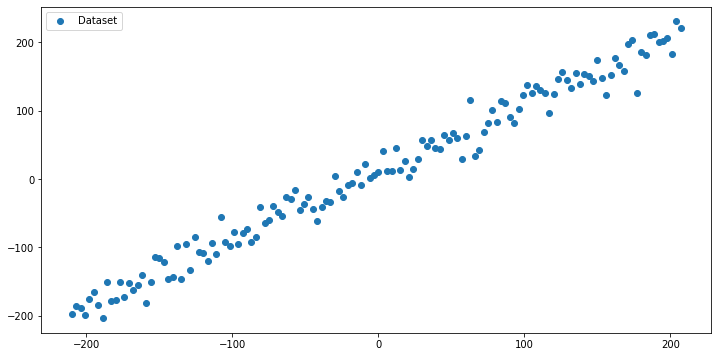

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random

X = np.arange(-210, 210, 3) 
y = np.arange(-200, 220, 3) + np.random.normal(0,20,140)

plt.figure( figsize = (12,6))
# plotting scattered plot of linear data
plt.scatter(X, y, label = 'Dataset')
plt.legend()
plt.show()

Splitting the dataset:

In [39]:
X_train = X[:110]
y_train = y[:110]
X_test = X[110:]
y_test = y[110:]

# print the input and output shapes
len(X_train), len(X_test)

(110, 30)

The output shows that there are:
- 110 observations in the training part
- 30 in the testing part.

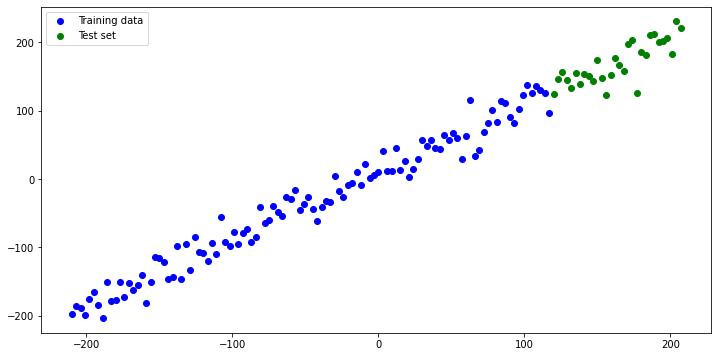

In [40]:
### Testing and training plots ###

# plot training set and input data
plt.figure( figsize = (12,6))
plt.scatter(X_train, y_train, c='b', label = 'Training data')
plt.scatter(X_test, y_test, c='g', label='Test set')
plt.legend()
plt.show()

## Defining regression model:

In [41]:
import tensorflow as tf
# create model and dense layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=1),
    tf.keras.layers.Dense(1)])

## Compiling the model:

In the following code cell there is possibility to change the epochs value to obtained different results and also uncomment part of code to change optimizer: Adam or SGD

In [113]:
model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),  # SGD -> stochastic gradient descent
              metrics = ['mae'])

# model.compile( loss = tf.keras.losses.mae,
#               optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
#               metrics = ['mae'])

# Train the model:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=15)

Epoch 1/15
4/4 [==============================] - 0s 2ms/step - loss: 34.3773 - mae: 34.3773
Epoch 2/15
4/4 [==============================] - 0s 3ms/step - loss: 39.2712 - mae: 39.2712
Epoch 3/15
4/4 [==============================] - 0s 2ms/step - loss: 32.9400 - mae: 32.9400
Epoch 4/15
4/4 [==============================] - 0s 2ms/step - loss: 45.7782 - mae: 45.7782
Epoch 5/15
4/4 [==============================] - 0s 2ms/step - loss: 39.9382 - mae: 39.9382
Epoch 6/15
4/4 [==============================] - 0s 2ms/step - loss: 41.9622 - mae: 41.9622
Epoch 7/15
4/4 [==============================] - 0s 2ms/step - loss: 38.3173 - mae: 38.3173
Epoch 8/15
4/4 [==============================] - 0s 2ms/step - loss: 41.0883 - mae: 41.0883
Epoch 9/15
4/4 [==============================] - 0s 2ms/step - loss: 41.1094 - mae: 41.1094
Epoch 10/15
4/4 [==============================] - 0s 2ms/step - loss: 39.5507 - mae: 39.5507
Epoch 11/15
4/4 [==============================] - 0s 2ms/step - loss

###Evaluating the model:

1/1 [==============================] - 0s 28ms/step
1.5310168266296387
9.698478698730469
R score is : -8.347670548449232


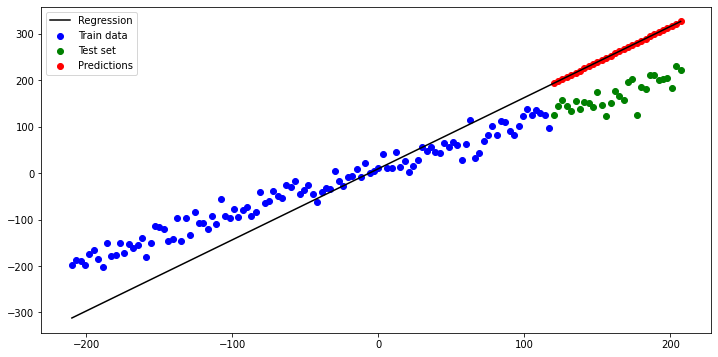

In [114]:
# Prediction of neural network model
preds = model.predict(X_test)

a = float (model.layers[0].get_weights()[0])
b = float (model.layers[0].get_weights()[1])

yp = (a*X) + b

print(a)
print(b)

# R-square score of the model:
import sklearn
# Importing the required module
from sklearn.metrics import r2_score
# Evaluating the model
print('R score is :', r2_score(y_test, preds))

# Visualization of result:
plt.figure(figsize=(12,6))
# plots training data, test set and predictions
plt.scatter(X_train, y_train, c="b", label="Train data")
plt.scatter(X_test, y_test, c="g", label="Test set")
plt.scatter(X_test, preds, c="r", label="Predictions")
plt.plot(X, yp, c="k", label = "Regression")
plt.legend()
plt.show()

### Below there is presented plot for best seareched by author prediction to compare with above plot

Epoch 1/20
4/4 [==============================] - 0s 2ms/step - loss: 40.3769 - mae: 40.3769
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 15.8572 - mae: 15.8572
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 21.2483 - mae: 21.2483
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 19.1096 - mae: 19.1096
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 13.6825 - mae: 13.6825
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 15.4698 - mae: 15.4698
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 14.4197 - mae: 14.4197
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 13.4403 - mae: 13.4403
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 13.6542 - mae: 13.6542
Epoch 10/20
4/4 [==============================] - 0s 3ms/step - loss: 13.8183 - mae: 13.8183
Epoch 11/20
4/4 [==============================] - 0s 2ms/step - loss

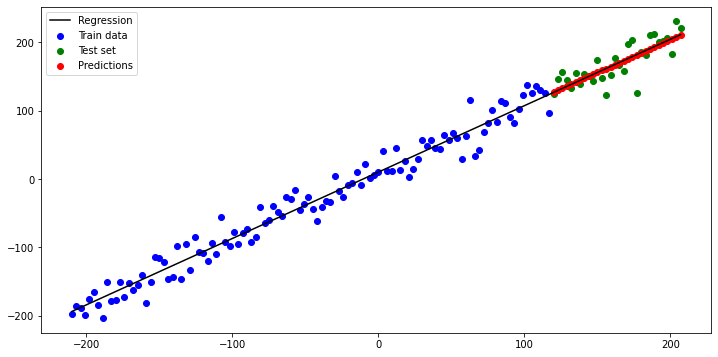

In [115]:
# model.compile( loss = tf.keras.losses.mae,
#               optimizer = tf.keras.optimizers.SGD(),#SGD-> stochastic gradient descent
#               metrics = ['mae'])

model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ['mae'])

# Training the model:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=20)

# Prediction of neural network model
preds = model.predict(X_test)

a = float (model.layers[0].get_weights()[0])
b = float (model.layers[0].get_weights()[1])

yp = (a*X) + b

print(a)
print(b)

# R-square score of the model:
import sklearn
# Importing the required module
from sklearn.metrics import r2_score
# Evaluating the model
print('R score is :', r2_score(y_test, preds))

# Visualization of result:
plt.figure(figsize=(12,6))
# plots training data, test set and predictions
plt.scatter(X_train, y_train, c="b", label="Train data")
plt.scatter(X_test, y_test, c="g", label="Test set")
plt.scatter(X_test, preds, c="r", label="Predictions")
plt.plot(X, yp, c="k", label = "Regression")
plt.legend()
plt.show()

# Results comparison:

I compared two optimizers/algorithms:


- Adam
- SGD

For Adam algorithm I obtained following results. R score equals 1 means equlity to input data / ideal  linearity.

1) Epochs value = 4  -->  R score = 0.6223157189688067

2) Epochs value = 15  -->  R score =  0.6473232052831042

3) Epochs value = 50  -->  R score = 0.6451812786370315

4) Epochs value = 100  -->  R score = 0.6463462496943748

5) Epochs value = 500  -->  R score = 0.6311047084028212

Where best results are for epoch equals around between 5 and 15.


For SGD optimizer I obtained:

1) Epochs value = 4  -->  R score = -1.9552486651406826

2) Epochs value = 15  -->  R score = -8.347670548449232

3) Epochs value = 20  -->  R score = 0.5232707773895615

4) Epochs value = 50  -->  R score = -9.86925155169708

5) Epochs value = 100  -->  R score = -3.1263299581582196

6) Epochs value = 500  -->  R score = -3.7313992842871624


Where best results are for epoch equals around between 20.
